In [1]:
import pandas as pd
import sys
sys.path.insert(0, '../')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
error = pd.read_csv('../combined_nn_results/refined_models/multiple_runs/final_errors.csv')

In [3]:
error

,Unnamed: 0,mean,std,min,max,median
0,postcode_only_TCN,0.359676,0.040943,0.324565,0.449626,0.342162
1,last_residual_approach_with_TCN,0.351962,0.022549,0.325881,0.395380,0.348261
2,local_and_global_conv_approach_with_TCN,0.381831,0.021749,0.352417,0.417327,0.378159
3,local_conv_with_grid_with_TCN_approach,0.356432,0.021469,0.331469,0.405335,0.352129
4,local_conv_with_grid_conv_TCN_approach,0.450877,0.198455,0.319985,0.907638,0.350815
5,pc_and_grid_input_together,0.378261,0.034259,0.343172,0.458297,0.365886
6,grid_added_at_each_TCN_together,0.355299,0.020756,0.333444,0.390848,0.349570
7,grid_conv_added_at_each_TCN_together,0.369009,0.025962,0.328719,0.400808,0.370703
8,frozen_branch_approach_TCN,0.327260,0.014788,0.310499,0.358980,0.324134


In [31]:
final_test_models = {'0': {'func': 'postcode_only_TCN', 'model_name': 'Post Code Together Approach'},
                     '1': {'func': 'last_residual_approach_with_TCN', 'model_name': 'Last Block Residual'},
                     '2': {'func': 'local_and_global_conv_approach_with_TCN',
                           'model_name': 'Local and Global Convolution'},
                     '3': {'func': 'local_conv_with_grid_with_TCN_approach',
                           'model_name': 'Post Code Data Convolution and Grid'},
                     '4': {'func': 'local_conv_with_grid_conv_TCN_approach',
                           'model_name': 'Post Code Data Conv and Grid Convolution'},
                     '5': {'func': 'pc_and_grid_input_together', 'model_name': 'Post Code Data and Grid Data Convolution'},
                     '6': {'func': 'grid_added_at_each_TCN_together', 'model_name': 'Gird Data added at each Postcode Conv'},
                     '7': {'func': 'grid_conv_added_at_each_TCN_together',
                           'model_name': 'Gird Data Conv at each Postcode Conv'},
                     '8': {'func': 'frozen_branch_approach_TCN', 'model_name': 'Grid and Postcode Forecast Approach'}}

In [29]:
# pd.read_csv('../combined_nn_results/refined_models/multiple_runs/postcode_only_TCN/errors.csv')

In [32]:
data_df = []

for key, model_vals in final_test_models.items():
    model_name = model_vals['func']
    model_string = model_vals['model_name']
    error_model = pd.read_csv(f'../combined_nn_results/refined_models/multiple_runs/{model_name}/errors.csv')
    rmse = error_model['nrmse'].tolist()
    for rmse_run in rmse:
        data_df.append([rmse_run, model_string])

In [35]:
err_dist = pd.DataFrame(data_df, columns = ['NRMSE', 'Approach'])

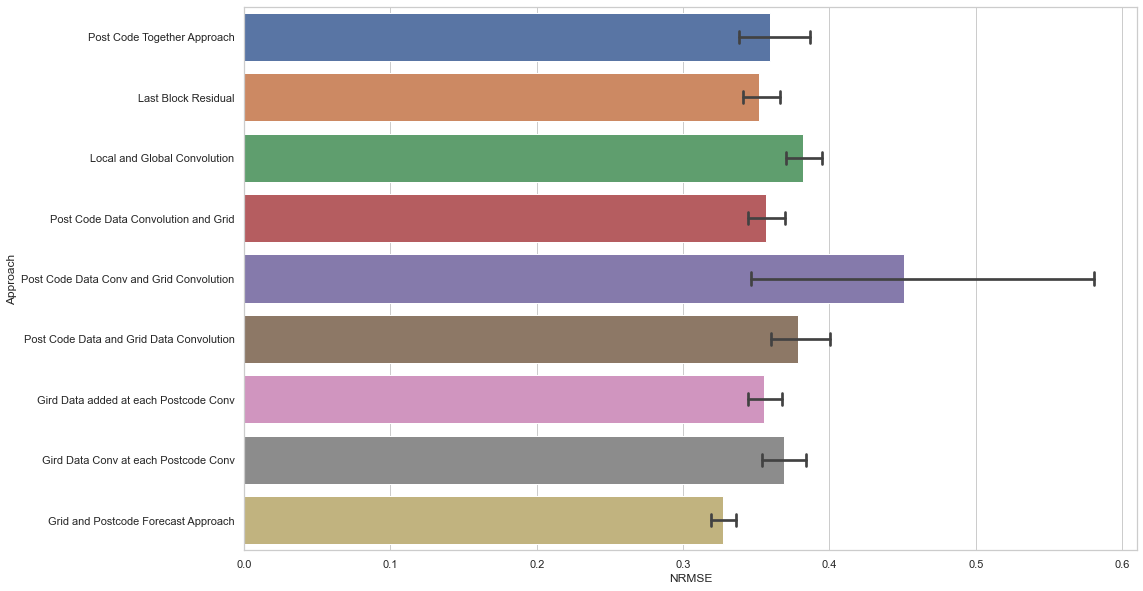

In [37]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(x="NRMSE", y="Approach", data=err_dist, capsize=.2)

In [44]:
final_test_models2 = {'0': {'func': 'postcode_only_TCN', 'model_name': 'Post Code Together Approach'},
                     '1': {'func': 'last_residual_approach_with_TCN', 'model_name': 'Last Block Residual'},
                     '2': {'func': 'local_and_global_conv_approach_with_TCN',
                           'model_name': 'Local and Global Convolution'},
                     '6': {'func': 'grid_added_at_each_TCN_together', 'model_name': 'Gird Data added at each Postcode Conv'},
                     '7': {'func': 'grid_conv_added_at_each_TCN_together',
                           'model_name': 'Gird Data Conv at each Postcode Conv'}}

In [45]:
data_df = []

for key, model_vals in final_test_models2.items():
    model_name = model_vals['func']
    model_string = model_vals['model_name']
    error_model = pd.read_csv(f'../combined_nn_results/refined_models/multiple_runs2/{model_name}/errors.csv')
    rmse = error_model['nrmse'].tolist()
    for rmse_run in rmse:
        data_df.append([rmse_run, model_string])

In [64]:
err_dist = pd.DataFrame(data_df, columns = ['NRMSE', 'Approach'])

In [65]:
arima_df = pd.DataFrame({'NRMSE': 0.3181, 'Approach': 'ARIMA - Postcode Aggregated'}, index = [0])

In [66]:
err_dist = err_dist.append(arima_df, ignore_index=True)

In [69]:
# err_dist

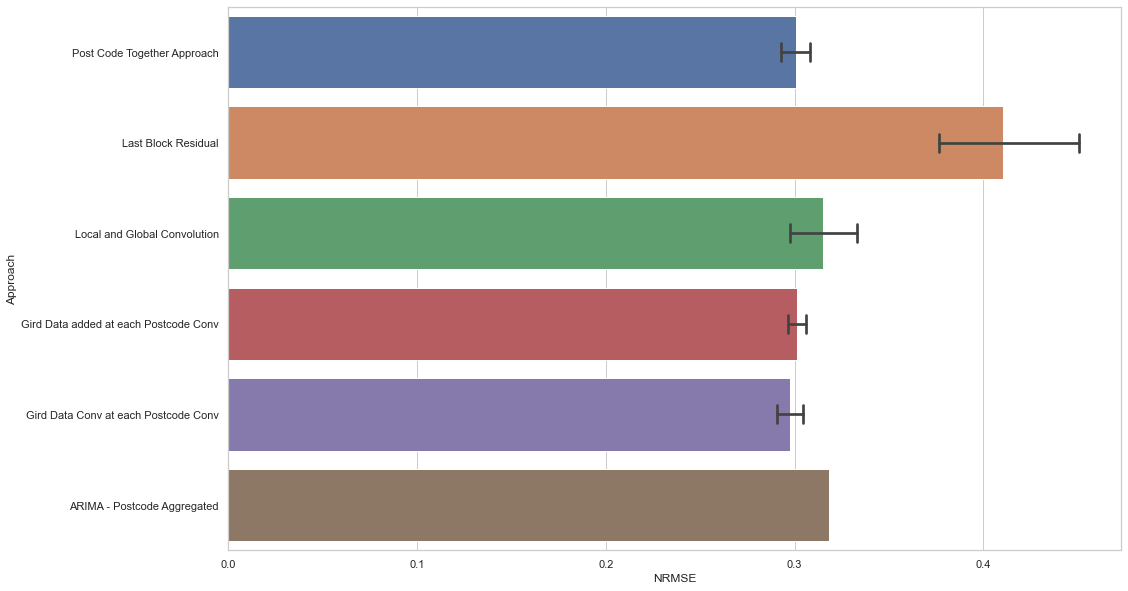

In [67]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(x="NRMSE", y="Approach", data=err_dist, capsize=.2)

In [82]:
#Lstm
errors = pd.read_csv('../conventional_lstm/final_errors.csv')

In [91]:
errors.groupby(by='Level').mean()

,Unnamed: 0,NRMSE
Level,,
grid,22.5,0.363569
pc,25.5,0.316074
site,26.5,0.261484
substation,24.5,0.349540
tl,23.5,0.350720


In [92]:
errors.groupby(by='Level').std()

,Unnamed: 0,NRMSE
Level,,
grid,15.138252,0.004390
pc,15.138252,0.010623
site,15.138252,0.011774
substation,15.138252,0.006883
tl,15.138252,0.006789


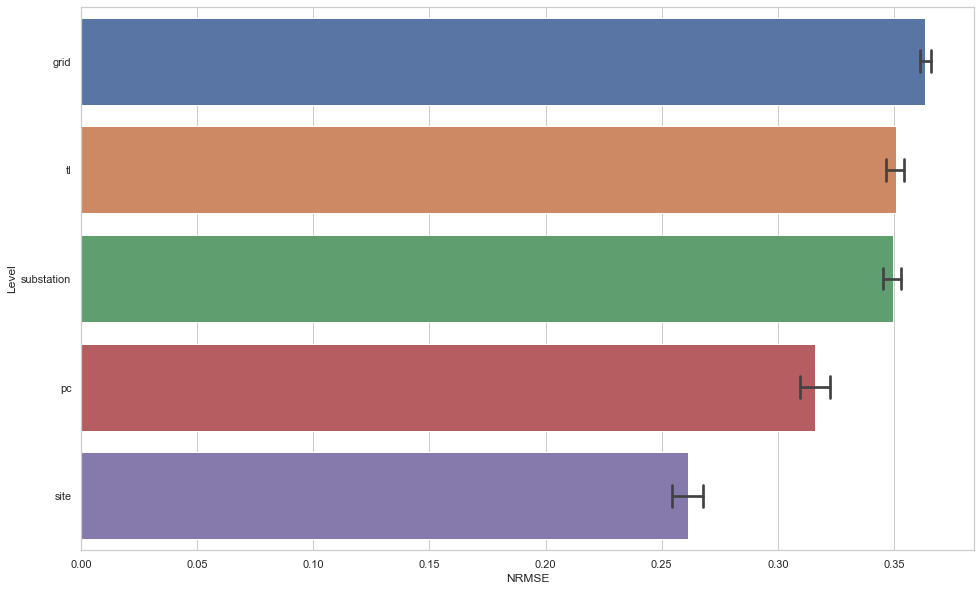

In [84]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(x="NRMSE", y="Level", data=errors, capsize=.2)

In [39]:
#CNN
errors = pd.read_csv('../conventional_cnn/final_errors.csv')
errors.groupby(by='Level').agg({'NRMSE': ['mean', 'std']})

NRMSE          
                mean       std
Level                         
grid        0.368286  0.010205
pc          0.292210  0.007728
site        0.262731  0.005053
substation  0.360834  0.008796
tl          0.362630  0.008340

In [106]:
errors = pd.read_csv('../conventional_tcn/final_errors.csv')
errors.groupby(by='Level').agg({'NRMSE': ['mean', 'std']})

NRMSE          
                mean       std
Level                         
grid        0.362444  0.013330
pc          0.292504  0.013954
site        0.241595  0.009793
substation  0.349829  0.010983
tl          0.354723  0.016418

In [40]:
errors_pc_cnn = errors.loc[errors['Level'] == 'pc']

In [41]:
errors_pc_cnn

,Unnamed: 0,NRMSE,Level
3,3,0.293724,pc
8,8,0.286820,pc
13,13,0.289410,pc
18,18,0.295006,pc
23,23,0.290656,pc
28,28,0.305067,pc
33,33,0.283093,pc
38,38,0.289699,pc
43,43,0.283717,pc
48,48,0.304905,pc


In [42]:
errors_approachB = pd.read_csv('../combined_nn_results/refined_models/approachB/errors.csv')

In [43]:
errors_approachB

,Unnamed: 0,nrmse
0,0,0.284107
1,1,0.290120
2,2,0.269562
3,3,0.284389
4,4,0.285546
5,5,0.271499
6,6,0.271889
7,7,0.280819
8,8,0.265184
9,9,0.263552


In [56]:
errors_approachB['nrmse']
df_plot2 = pd.DataFrame(errors_approachB['nrmse'])
df_plot2['Approach'] = 'Approach B'
df_plot2 = df_plot2.rename(columns = {'nrmse':'NRMSE'})

In [57]:
df_plot = pd.DataFrame(errors_pc_cnn['NRMSE'])
df_plot['Approach'] = 'Benchmark - CNN'

In [58]:
errors_approachA = pd.read_csv('../combined_nn_results/refined_models/approachA/errors.csv')
df_plot3 = pd.DataFrame(errors_approachA['nrmse'])
df_plot3['Approach'] = 'Approach A'
df_plot3 = df_plot3.rename(columns = {'nrmse':'NRMSE'})

In [59]:
plt_df = pd.concat([df_plot, df_plot2, df_plot3])

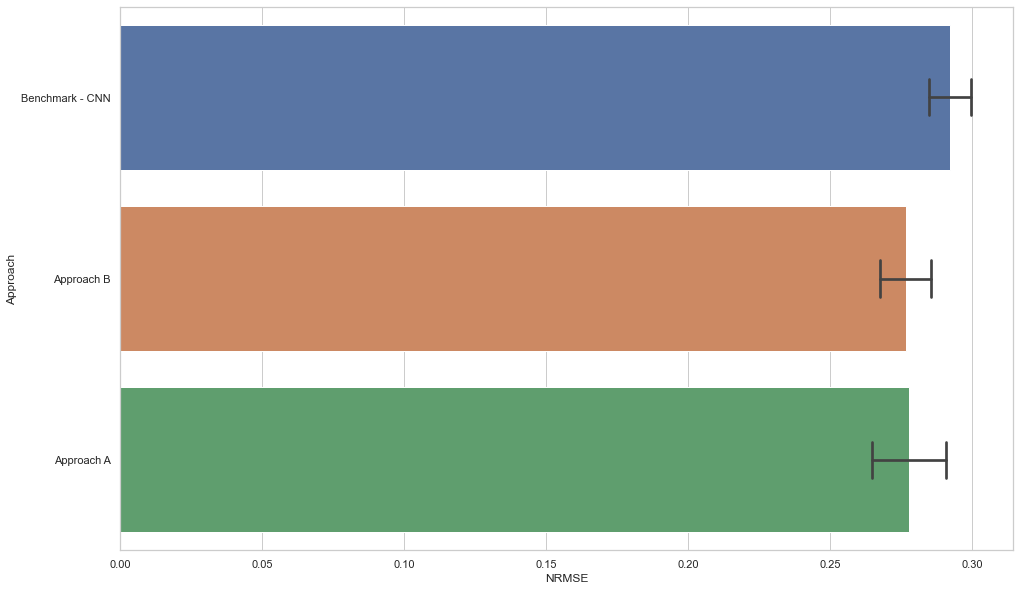

In [63]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(x="NRMSE", y="Approach", data=plt_df, capsize=.2, ci="sd")

In [19]:
from scipy import stats
k2, p = stats.normaltest(errors_pc_cnn['NRMSE'])
alpha = 1e-3
print("p = {:g}".format(p))
p = 8.4713e-19

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.501456
The null hypothesis can be rejected


In [20]:
stats.mannwhitneyu(errors_pc_cnn['NRMSE'], errors_approachB['nrmse'])

MannwhitneyuResult(statistic=11.0, pvalue=0.0018052571561648014)

In [21]:
errors_approachA = pd.read_csv('../combined_nn_results/refined_models/approachA/errors.csv')

In [37]:
# errors_approachA

In [22]:
stats.mannwhitneyu(errors_pc_cnn['NRMSE'], errors_approachA['nrmse'])

MannwhitneyuResult(statistic=19.0, pvalue=0.01056696406458055)

In [34]:
errors_approachA_2 = pd.read_csv('../combined_nn_results/refined_models/approachA/possibility4/errors.csv')

In [35]:
stats.mannwhitneyu(errors_pc_cnn['NRMSE'], errors_approachA_2['nrmse'])

MannwhitneyuResult(statistic=45.0, pvalue=0.3668649978481236)

In [ ]:
plt.figure(figsize=(16, 10))
ax = sns.barplot(x="NRMSE", y="Approach", data=err_dist, capsize=.2)

## SWIS CONVENTIONAL NNs

In [2]:
errors = pd.read_csv('../swis_conventional_nn_results/conventional_lstm/errors/final_errors.csv')

In [3]:
errors.groupby(by='Level').mean()

,Unnamed: 0,NRMSE
Level,,
grid,9,0.255128
pc,10,0.203182


In [6]:
errors.groupby(by='Level').std()

,Unnamed: 0,NRMSE
Level,,
grid,6.055301,0.006773
pc,6.055301,0.010369


In [2]:
errors = pd.read_csv('../swis_conventional_nn_results/conventional_cnn/errors/final_errors.csv')

In [3]:
errors.groupby(by='Level').mean()

,Unnamed: 0,NRMSE
Level,,
grid,9,0.264341
pc,10,0.190054


In [4]:
errors.groupby(by='Level').std()

,Unnamed: 0,NRMSE
Level,,
grid,6.055301,0.011408
pc,6.055301,0.004253


In [14]:
errors = pd.read_csv('../swis_conventional_nn_results/conventional_tcn/errors/final_errors.csv')

In [18]:
# errors

In [12]:
errors.groupby(by='Level').mean()

,Unnamed: 0,NRMSE
Level,,
grid,9,0.283288
pc,10,0.161564


In [13]:
errors.groupby(by='Level').std()

,Unnamed: 0,NRMSE
Level,,
grid,6.055301,0.017420
pc,6.055301,0.004206


## Combined

In [26]:
errors = pd.read_csv('../swis_combined_nn_results/approachA/SWIS_APPROACH_A/errors/final_errors.csv')

In [28]:
# errors

In [8]:
errors.groupby(by='Level').mean()

,Unnamed: 0,NRMSE
Level,,
grid,4.5,0.183275


In [10]:
errors.groupby(by='Level').std()

,Unnamed: 0,NRMSE
Level,,
grid,3.02765,0.003579


In [20]:
errors = pd.read_csv('../swis_combined_nn_results/approachB/SWIS_APPROACH_B_with_clustering/errors/final_errors.csv')

In [21]:
errors.groupby(by='Level').mean()

,Unnamed: 0,NRMSE
Level,,
grid,0,0.211362


In [22]:
errors = pd.read_csv('../swis_combined_nn_results/approachB/SWIS_APPROACH_B/errors/final_errors.csv')

In [23]:
errors.groupby(by='Level').mean()

,Unnamed: 0,NRMSE
Level,,
grid,0,0.189056


In [29]:
errors = pd.read_csv('../swis_combined_nn_results/approachA/SWIS_APPROACH_A_SKIP/errors/final_errors.csv')

In [33]:
# errors

In [30]:
errors.groupby(by='Level').mean()

,Unnamed: 0,NRMSE
Level,,
grid,4.5,0.179876


In [31]:
errors.groupby(by='Level').std()

,Unnamed: 0,NRMSE
Level,,
grid,3.02765,0.008465
